In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [14]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [11]:
data=df[['Annual_Income_(k$)','Spending_Score']]

In [12]:
data.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
data.shape

(200, 2)

In [20]:
X = data.values

In [21]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [24]:
from sklearn.cluster import KMeans
wc_ss=[]
for i in range(1,11):
  kmeans_clu=KMeans(n_clusters=i, random_state=56)
  kmeans_clu.fit(X)
  wc_ss.append(kmeans_clu.inertia_)

<function matplotlib.pyplot.show>

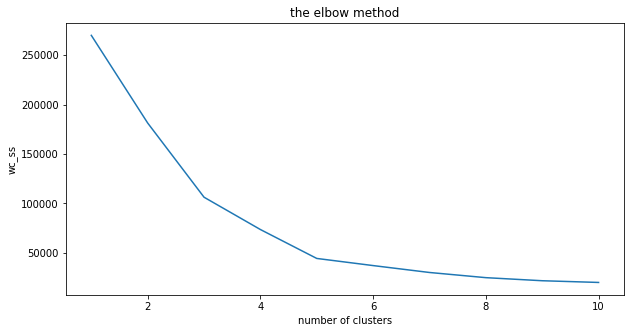

In [25]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wc_ss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wc_ss')
plt.show

In [28]:
kmeans=KMeans(n_clusters=5,random_state=56)
y_kmeans=kmeans.fit_predict(X)

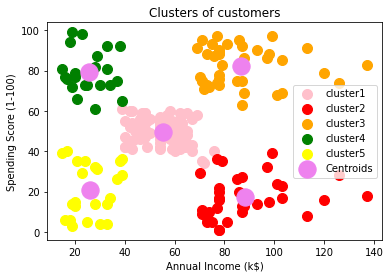

In [33]:
plt.scatter(X[y_kmeans ==0,0],X[y_kmeans ==0,1], s = 100, c="pink" , label='cluster1')
plt.scatter(X[y_kmeans ==1,0],X[y_kmeans ==1,1], s = 100, c="red" , label='cluster2')
plt.scatter(X[y_kmeans ==2,0],X[y_kmeans ==2,1], s = 100, c="orange" , label='cluster3')
plt.scatter(X[y_kmeans ==3,0],X[y_kmeans ==3,1], s = 100, c="green" , label='cluster4')
plt.scatter(X[y_kmeans ==4,0],X[y_kmeans ==4,1], s = 100, c="yellow" , label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'violet', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()